# Analyse the auto insurance claims and detect the fraudulent claims

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##### import the dataset 

In [101]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\insurance_claims.csv')

In [102]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
#changing data type of policy_bind_date & incident to date

In [103]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

#### checking shape

In [104]:
data.shape

(1000, 40)

#### checking null values

In [105]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [106]:
# we can see some missing values denoted by '?'

data.replace('?', np.nan, inplace = True)

In [107]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [108]:
import missingno as msno

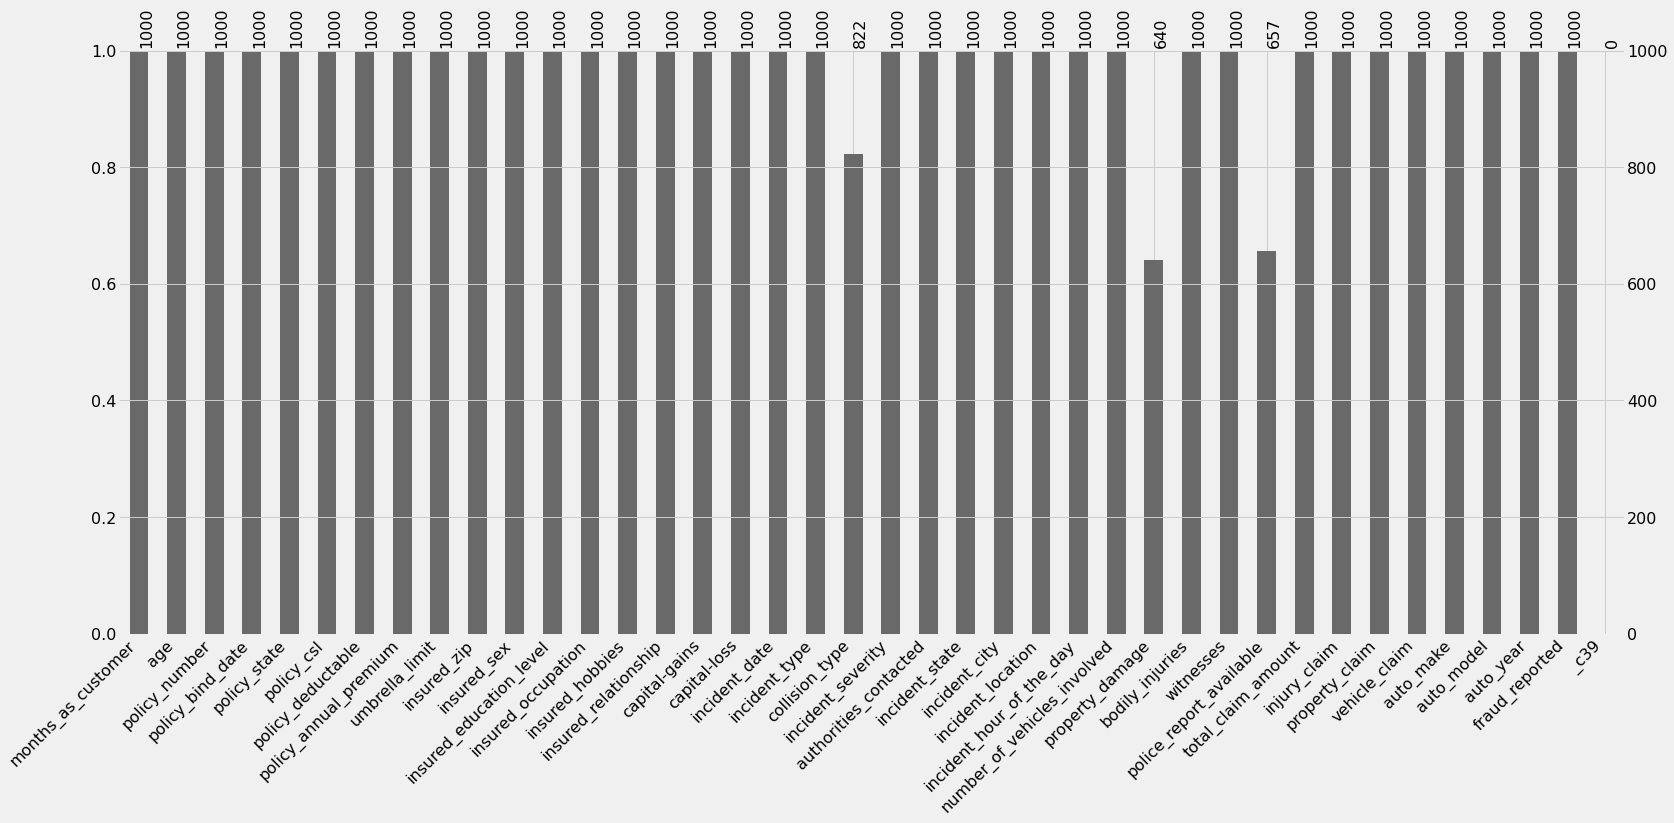

In [109]:
# visualizing missing values



msno.bar(data)
plt.xticks(rotation=90)
plt.show()

### Filling missing values

##### Handling missing values in collision type

In [110]:
data['collision_type']

0       Side Collision
1                  NaN
2       Rear Collision
3      Front Collision
4                  NaN
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                NaN
Name: collision_type, Length: 1000, dtype: object

In [111]:
data['collision_type'].mode()

0    Rear Collision
dtype: object

In [112]:
data['collision_type'].mode()[0]

'Rear Collision'

In [113]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])

##### Handling missing values in property_damage

In [114]:
data['property_damage']

0      YES
1      NaN
2       NO
3      NaN
4       NO
      ... 
995    YES
996    YES
997    NaN
998    NaN
999    NaN
Name: property_damage, Length: 1000, dtype: object

In [115]:
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

##### Handling missing values in property_damage police_report_available

In [116]:
data['police_report_available'] 

0      YES
1      NaN
2       NO
3       NO
4       NO
      ... 
995    NaN
996    NaN
997    YES
998    YES
999    NaN
Name: police_report_available, Length: 1000, dtype: object

In [117]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

#### After handling nan checking for nan

In [118]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [120]:
data.drop(['_c39'],axis=1,inplace=True)

## Checking for duplicates

In [25]:
 data.policy_number.duplicated().sum()#to check duplicate values in column

0

In [26]:
data.duplicated().sum()#duplicate rows

0

### Data Analysis

In [27]:
data.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [28]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

#### Finding correlation

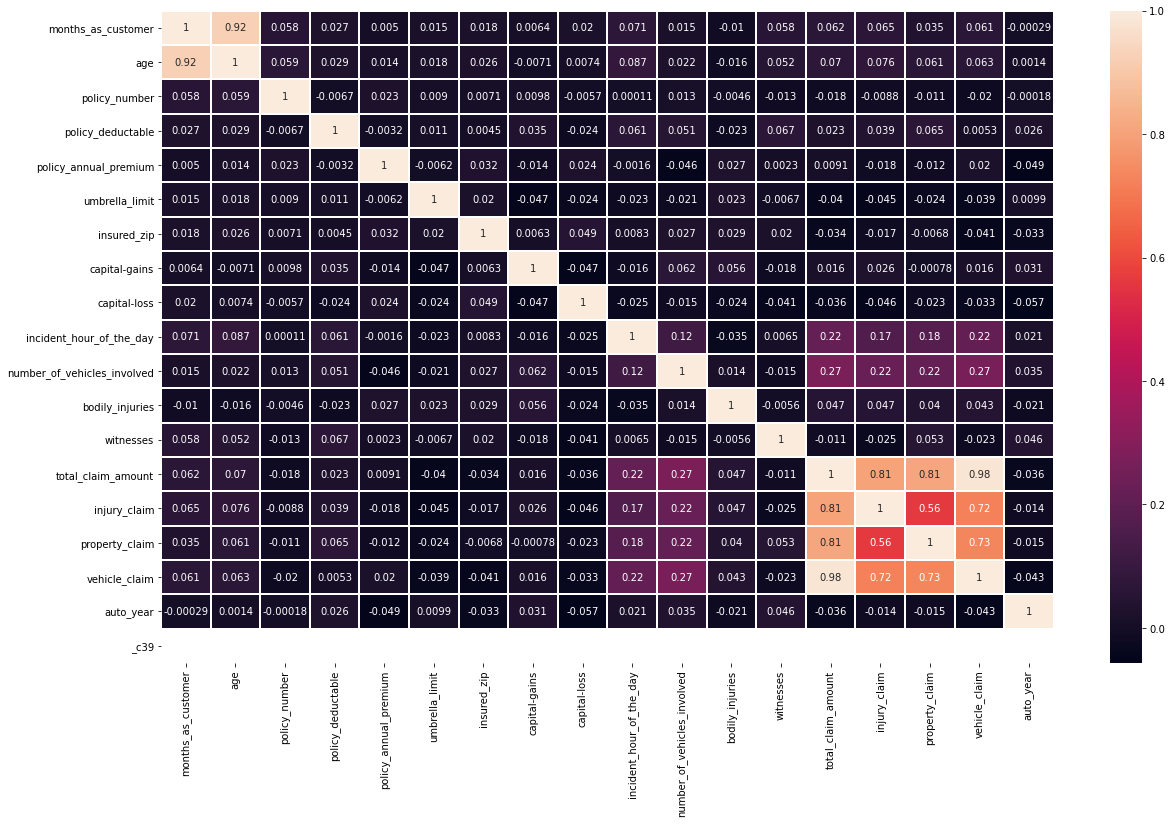

In [29]:
plt.figure(figsize = (20, 12))
data_corr=data.corr()
# drop cols
data_corr.drop(['_c39'], axis=1, inplace=True)
sns.heatmap(data_corr,annot=True, fmt = '.2g', linewidth = 1)
plt.show()

##### Finding covariance

In [30]:
data.cov()

months_as_customer            age  policy_number  \
months_as_customer                 1.325104e+04     970.201810   1.703130e+06   
age                                9.702018e+02      83.544841   1.395997e+05   
policy_number                      1.703130e+06  139599.665361   6.608139e+10   
policy_deductable                  1.888144e+03     163.235235  -1.059731e+06   
policy_annual_premium              1.410315e+02      32.145675   1.416366e+06   
umbrella_limit                     4.098745e+06  380632.632633   5.296036e+09   
insured_zip                        1.476998e+05   16780.292669   1.305565e+08   
capital-gains                      2.053193e+04   -1802.445245   7.023384e+07   
capital-loss                       6.537987e+04    1892.620220  -4.095652e+07   
incident_hour_of_the_day           5.652515e+01       5.538026   2.013220e+02   
number_of_vehicles_involved        1.728322e+00       0.205834   3.518009e+03   
bodily_injuries                   -9.593273e-01      -0.117534  -9.610359e+02   
witnesses                          7.468871e+00       0.531856  -3.617162e+03   
total_claim_amount                 1.887564e+05   16859.079960  -1.222275e+08   
injury_claim                       3.670575e+04    3369.297137  -1.099333e+07   
property_claim                     1.940521e+04    2685.543183  -1.324355e+07   
vehicle_claim                      1.326454e+05   10804.239640  -9.799063e+07   
auto_year                         -2.024645e-01       0.074430  -2.829887e+02   
_c39                                        NaN            NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                1.888144e+03           1.410315e+02   
age                               1.632352e+02           3.214568e+01   
policy_number                    -1.059731e+06           1.416366e+06   
policy_deductable                 3.743784e+05          -4.848613e+02   
policy_annual_premium            -4.848613e+02           5.961772e+04   
umbrella_limit                    1.527928e+07          -3.504155e+06   
insured_zip                       1.993895e+05           5.664307e+05   
capital-gains                     6.005009e+05          -9.349637e+04   
capital-loss                     -4.048617e+05           1.615803e+05   
incident_hour_of_the_day          2.591752e+02          -2.678940e+00   
number_of_vehicles_involved       3.192793e+01          -1.144158e+01   
bodily_injuries                  -1.142342e+01           5.362622e+00   
witnesses                         4.531331e+01           6.326876e-01   
total_claim_amount                3.689501e+05           5.862176e+04   
injury_claim                      1.167917e+05          -2.101409e+04   
property_claim                    1.912697e+05          -1.372875e+04   
vehicle_claim                     6.088869e+04           9.336460e+04   
auto_year                         9.608809e+01          -7.230676e+01   
_c39                                       NaN                    NaN   

                             umbrella_limit   insured_zip  capital-gains  \
months_as_customer             4.098745e+06  1.476998e+05   2.053193e+04   
age                            3.806326e+05  1.678029e+04  -1.802445e+03   
policy_number                  5.296036e+09  1.305565e+08   7.023384e+07   
policy_deductable              1.527928e+07  1.993895e+05   6.005009e+05   
policy_annual_premium         -3.504155e+06  5.664307e+05  -9.349637e+04   
umbrella_limit                 5.278077e+12  3.240420e+09  -3.026763e+09   
insured_zip                    3.240420e+09  5.141121e+09   1.259612e+07   
capital-gains                 -3.026763e+09  1.259612e+07   7.768588e+08   
capital-loss                  -1.553189e+09  9.948976e+07  -3.674132e+07   
incident_hour_of_the_day      -3.714154e+05  4.124026e+03  -3.178587e+03   
number_of_vehicles_involved   -4.978879e+04  2.005228e+03   1.750553e+03   
bodily_injuries                4.28

## policy_state

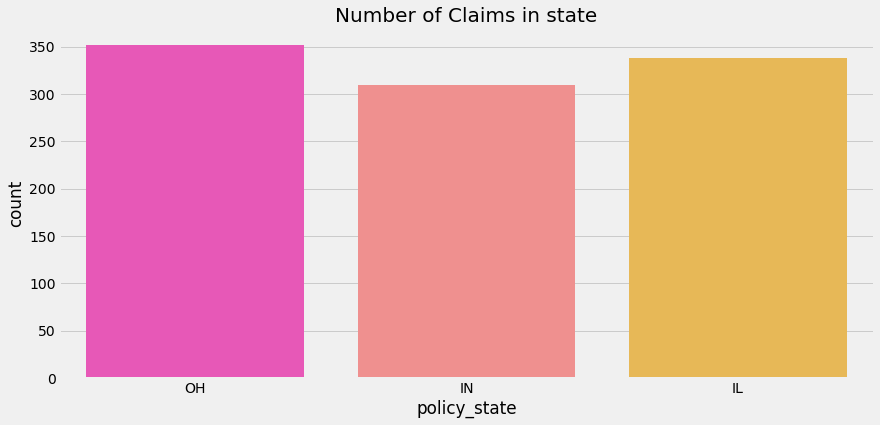

In [31]:


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(data['policy_state'], palette = 'spring')
plt.title('Number of Claims in state', fontsize = 20)
plt.show()

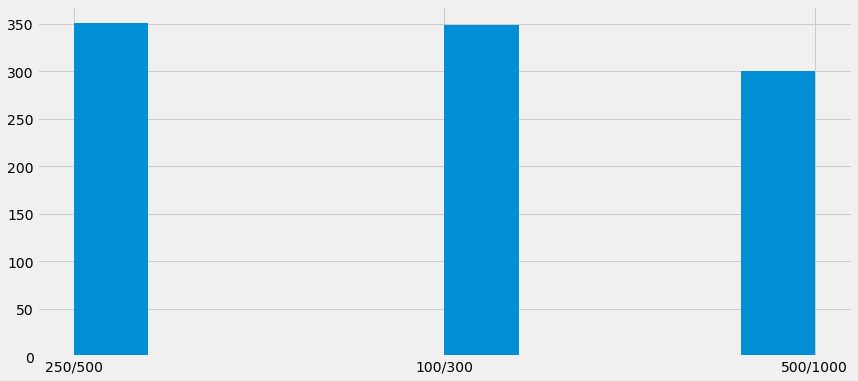

In [32]:
data.policy_csl.hist()

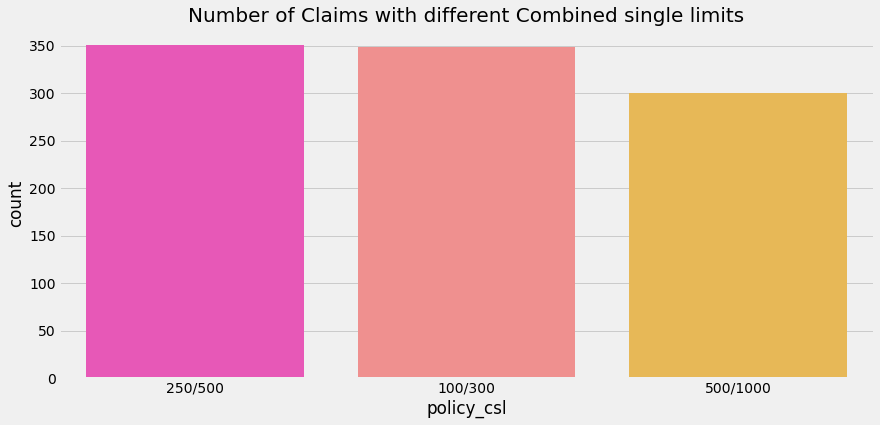

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 6)

sns.countplot(data['policy_csl'], palette = 'spring')
plt.title('Number of Claims with different Combined single limits', fontsize = 20)
plt.show()

In [119]:
data['csl_per_person'] = data.policy_csl.str.split('/', expand=True)[0]
data['csl_per_accident'] = data.policy_csl.str.split('/', expand=True)[1]


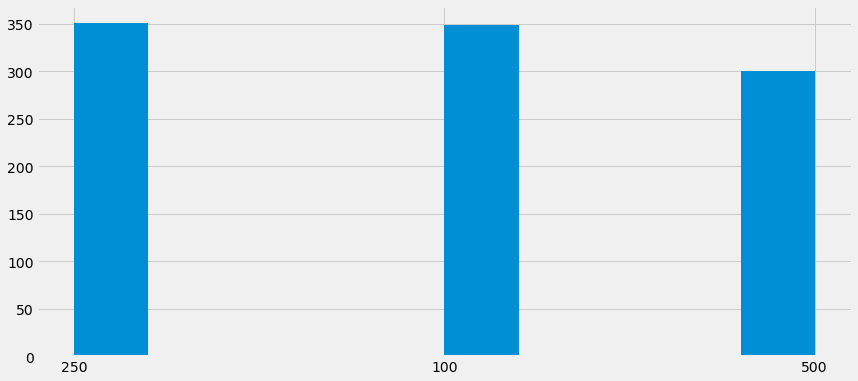

In [35]:
data['csl_per_person'].hist()#for bodily injury

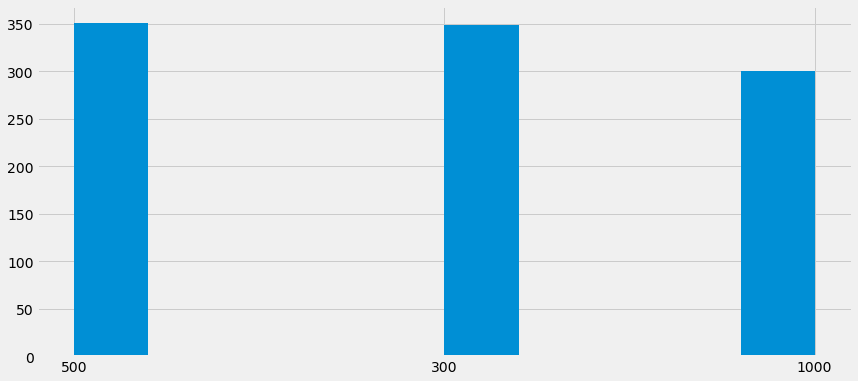

In [36]:
data['csl_per_accident'].hist()

#### umbrella_Limit

In [37]:
umbrella_count=data[data['umbrella_limit'] >0]
print("'claims with umbrella insurance policy are:'",len(umbrella_count))

'claims with umbrella insurance policy are:' 201


### umbrella_limit column distribution

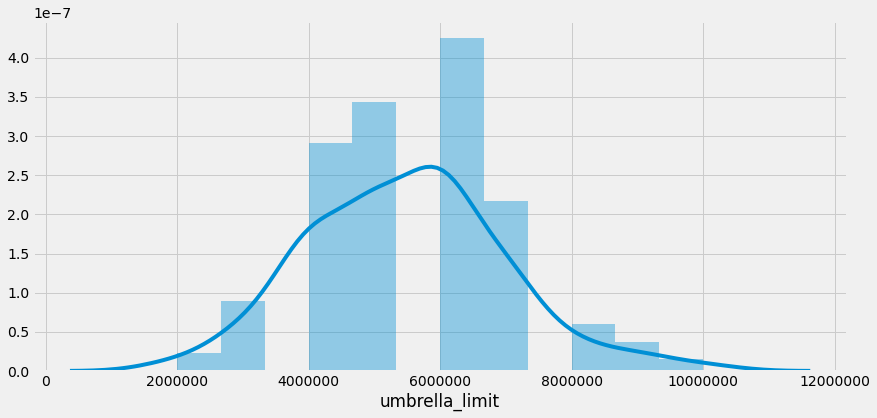

In [38]:
sns.distplot(umbrella_count['umbrella_limit'])
plt.ticklabel_format(style='plain',axis='x')


##### The data is almost normally distributed

### incident city vs incident type

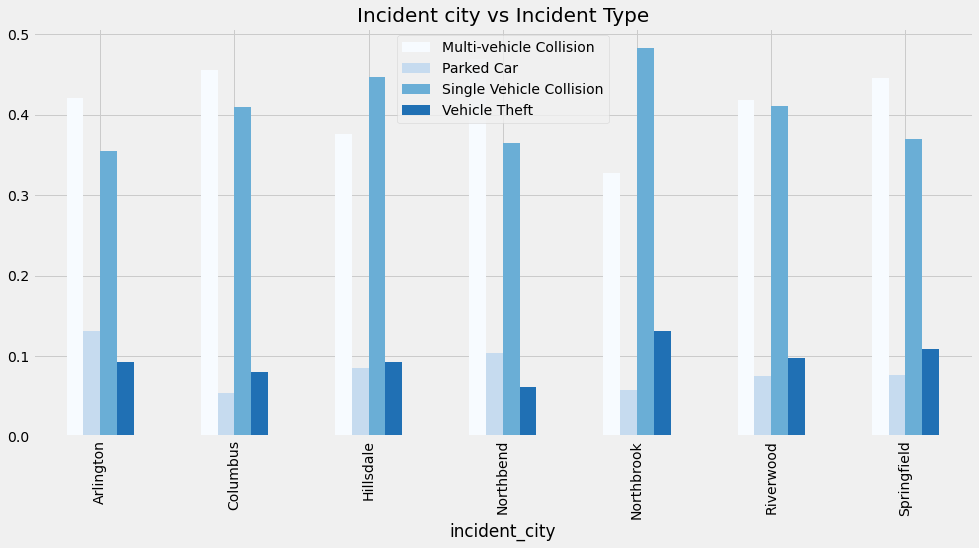

In [172]:
incident = pd.crosstab(data['incident_city'], data['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident city vs Incident Type', fontsize = 20)
plt.legend()
plt.show()

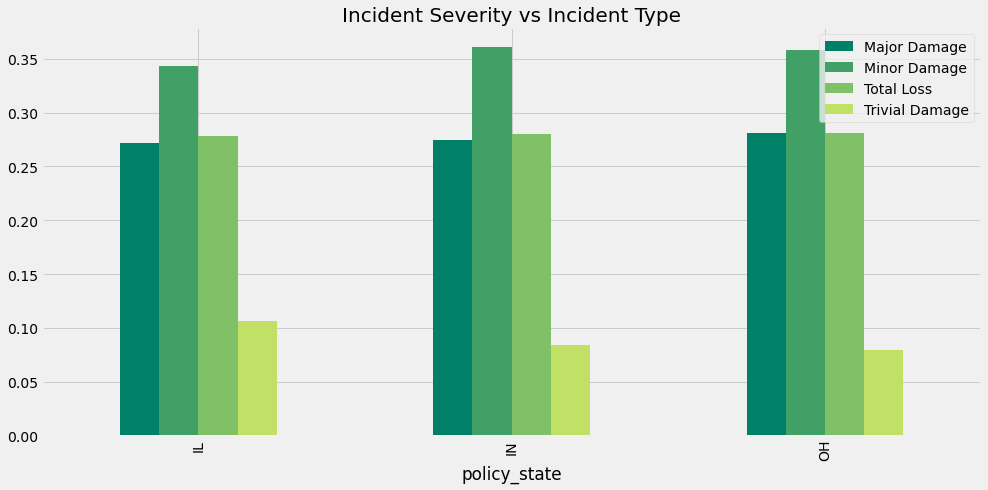

In [179]:
incident = pd.crosstab(data['policy_state'], data['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Severity vs Incident Type', fontsize = 20)
plt.legend()
plt.show()

# incident severity according to incident type

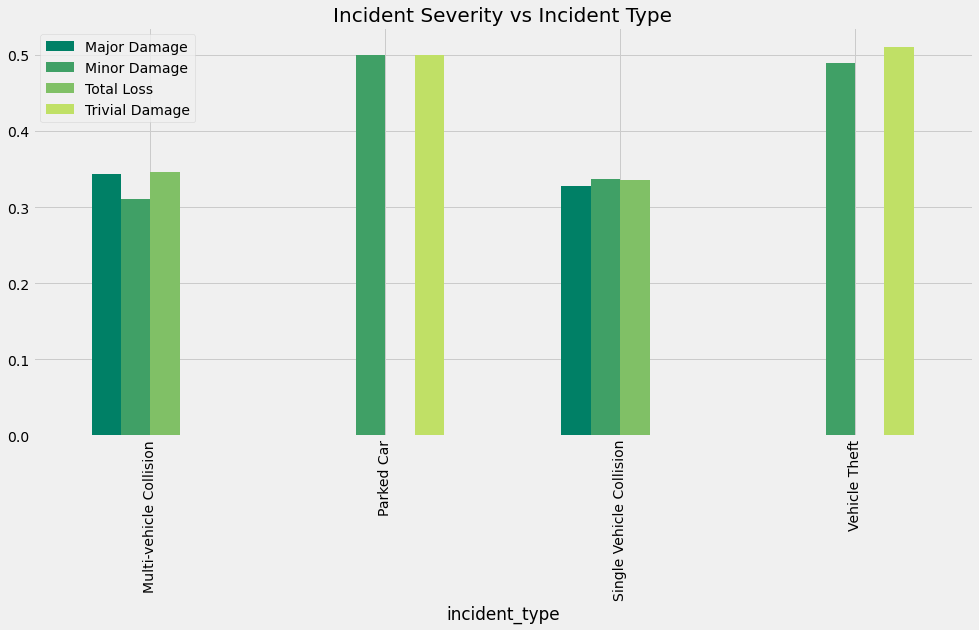

In [173]:
incident = pd.crosstab(data['incident_type'], data['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Severity vs Incident Type', fontsize = 20)
plt.legend()
plt.show()

In [41]:
# incident type according to collision type

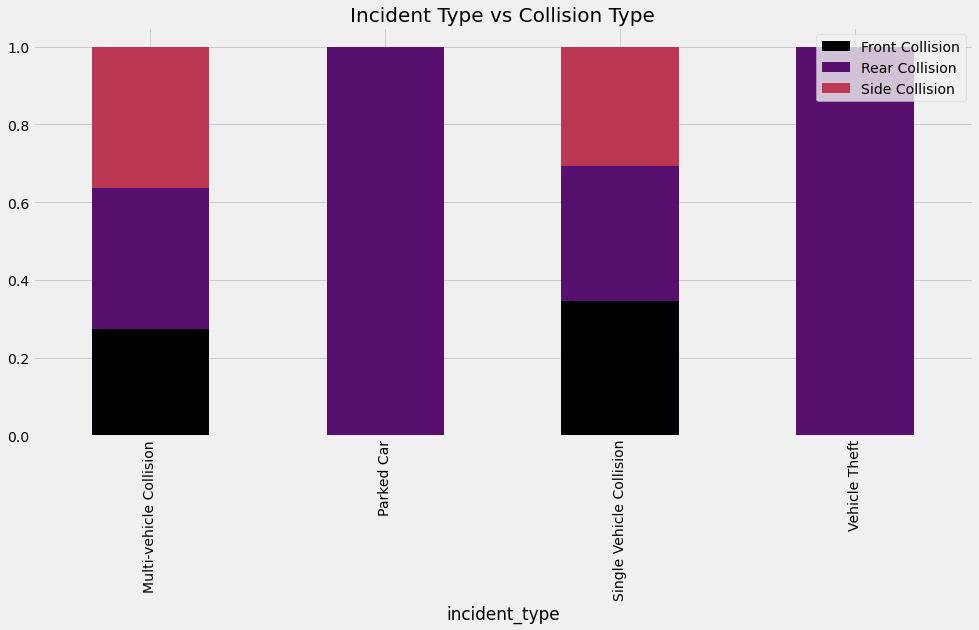

In [42]:
incident = pd.crosstab(data['incident_type'], data['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

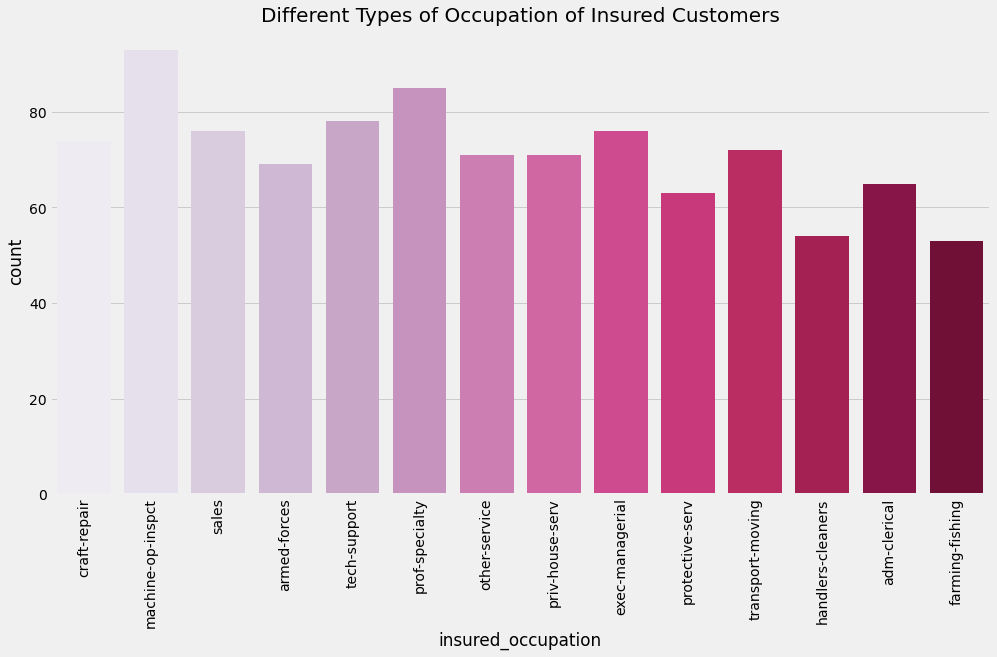

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_occupation'], palette = 'PuRd')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

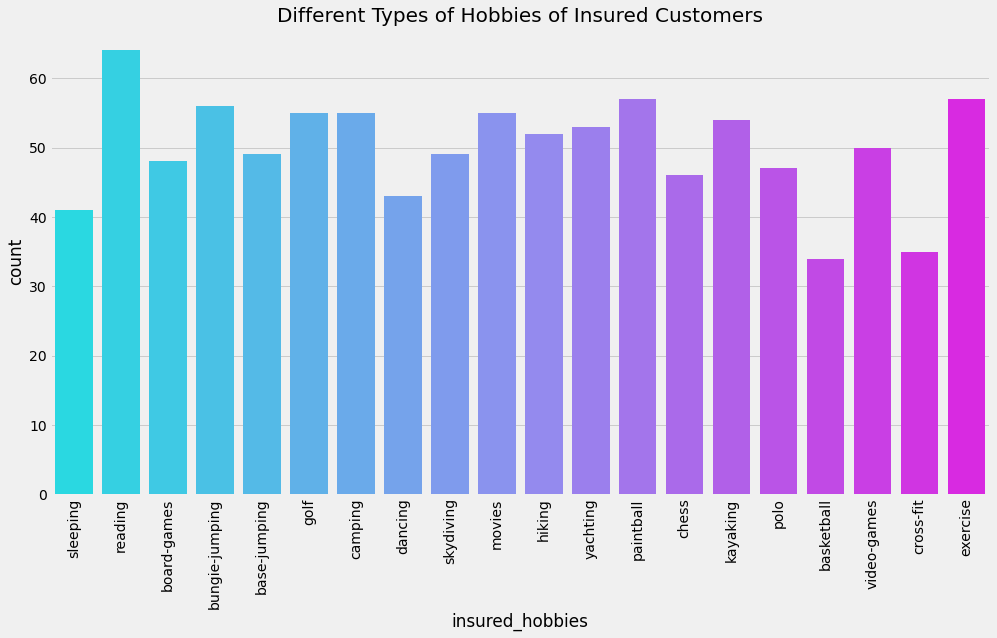

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

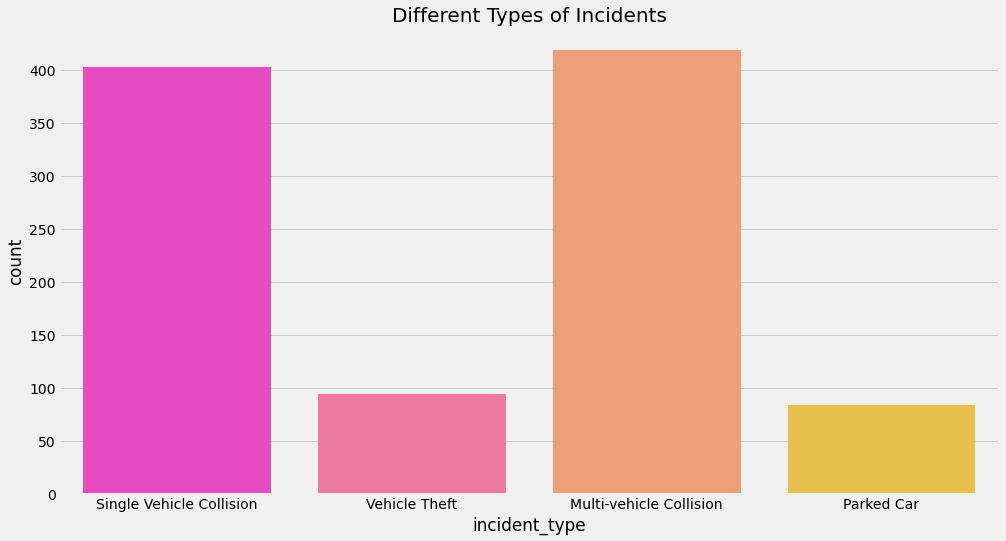

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

In [210]:
def normalized(d):
    xmin=d.min()
    xmax=d.max()
    normalized_data=d.map(lambda x:(x-xmin)/(xmax-xmin))
    return normalized_data

In [211]:
from sklearn import preprocessing

In [212]:
def linear_regression_function(data,attr1,attr2):
    
    x_data=data[attr1]
    x_data=normalized(x_data)
    y_data=data[attr2]
    y_data=normalized(y_data)

    lr_model=LinearRegression()
    lr_model.fit(x_data.values.reshape(-1,1),y_data.values.reshape(-1,1))
    y_pred=lr_model.predict(x_data.values.reshape(-1,1))
    plt.scatter(x_data,y_data)
    plt.plot(x_data,y_pred)
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.title('Regression Analysis')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain',axis='x')
    plt.ticklabel_format(style='plain',axis='y')
    plt.savefig("F:\\Python_Track_Training\\Statistics\\project3\\" + attr1+"vs"+attr2+".png")
    return (lr_model.coef_,lr_model.intercept_,r2_score(y_data,y_pred))

(array([[0.01382418]]), array([0.45159915]), 8.269590984499864e-05)

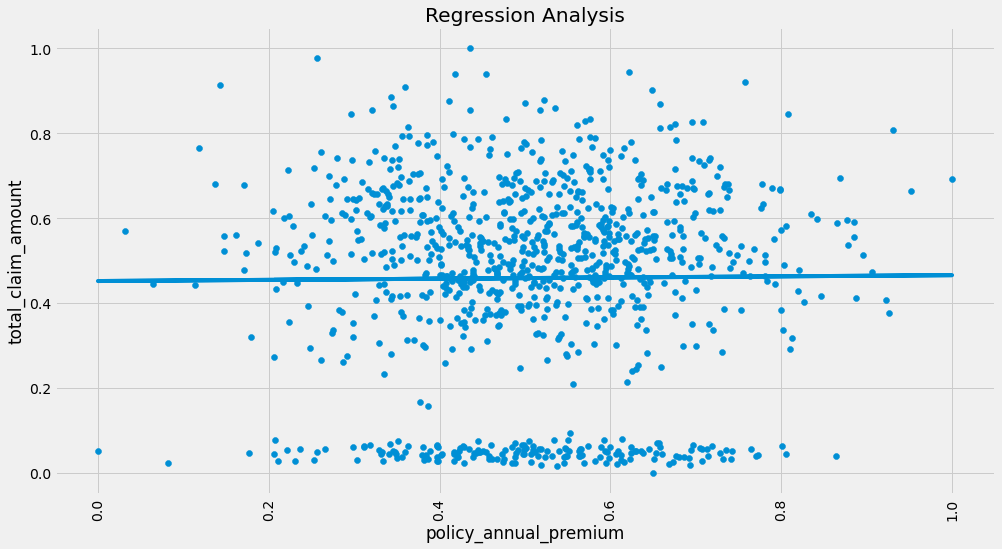

In [213]:


linear_regression_function(data,'policy_annual_premium','total_claim_amount')

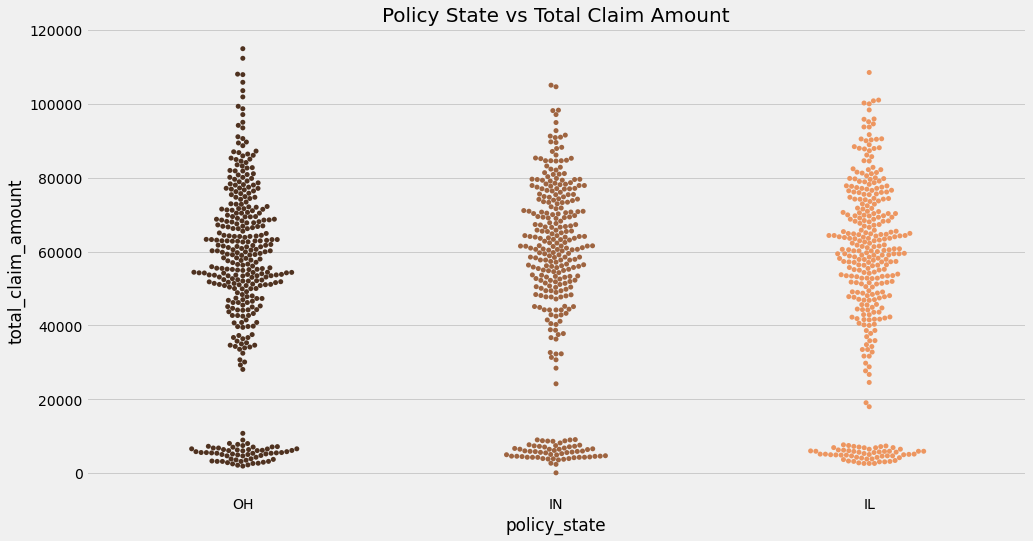

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.swarmplot(data['policy_state'], data['total_claim_amount'], palette = 'copper')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

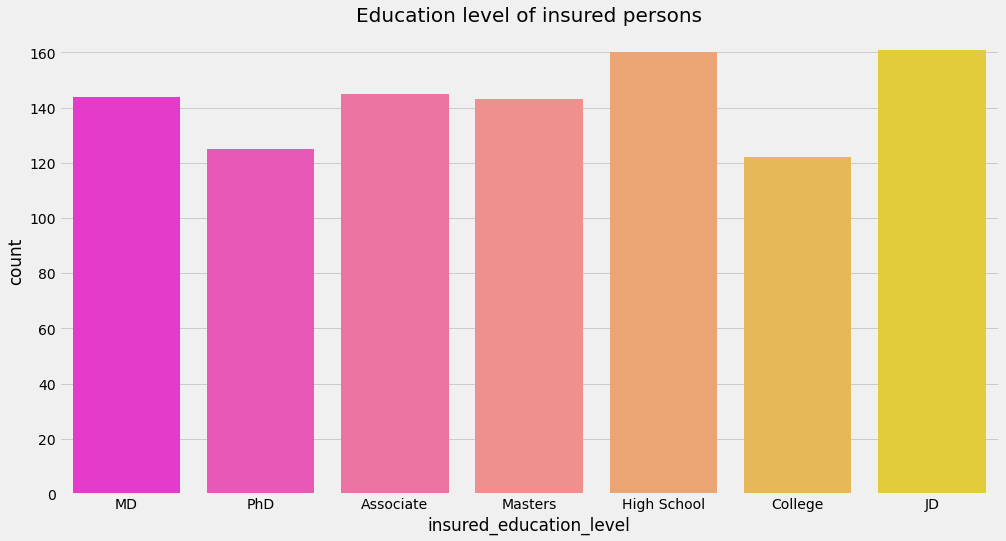

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_education_level'], palette = 'spring')
plt.title('Education level of insured persons', fontsize = 20)
plt.show()

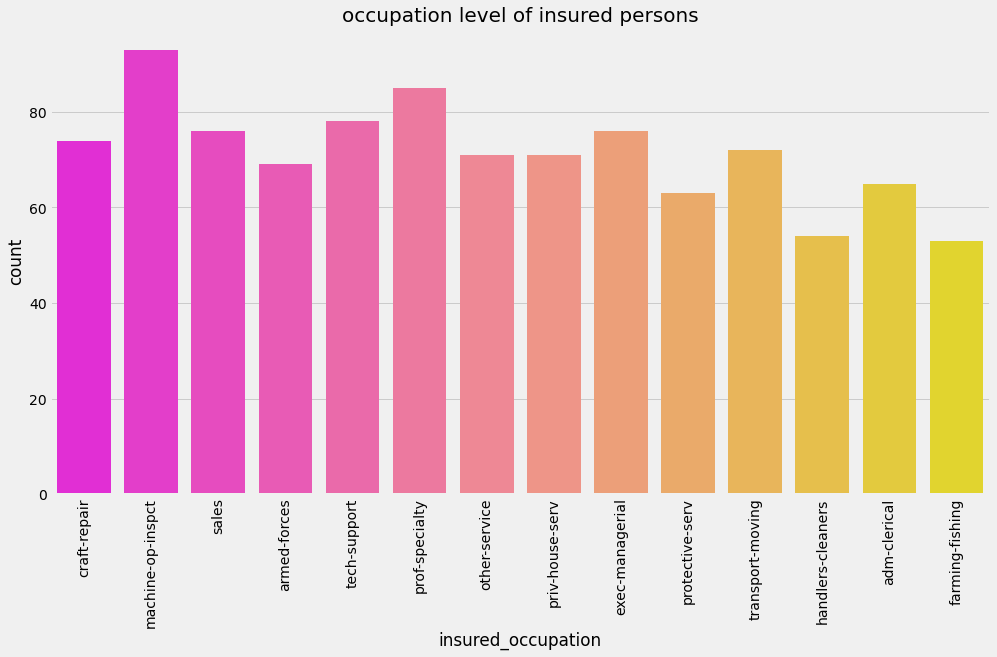

In [50]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_occupation'], palette = 'spring')
plt.title('occupation level of insured persons', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

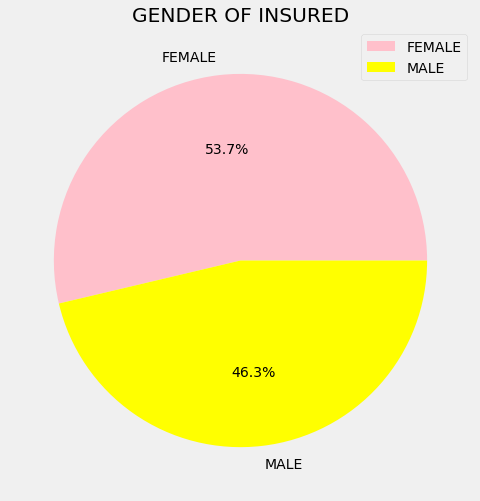

In [51]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
fraud = data['insured_sex'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

color = ['pink','yellow']

plt.pie(size_fraud,labels=fraud.index,colors=color,autopct='%1.1f%%')
plt.title('GENDER OF INSURED')
plt.legend(labels=fraud.index)

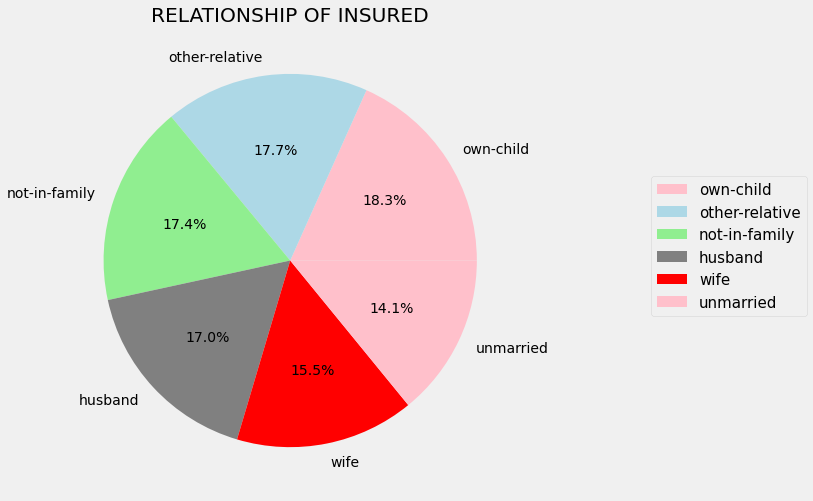

In [52]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
fraud = data['insured_relationship'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

color = ['pink', 'lightblue','lightgreen','grey','red']

plt.pie(size_fraud,labels=fraud.index,colors=color,autopct='%1.1f%%')
plt.title('RELATIONSHIP OF INSURED')
plt.legend(labels=fraud.index,bbox_to_anchor=(1,0.5), loc="center right", fontsize=15,bbox_transform=plt.gcf().transFigure)

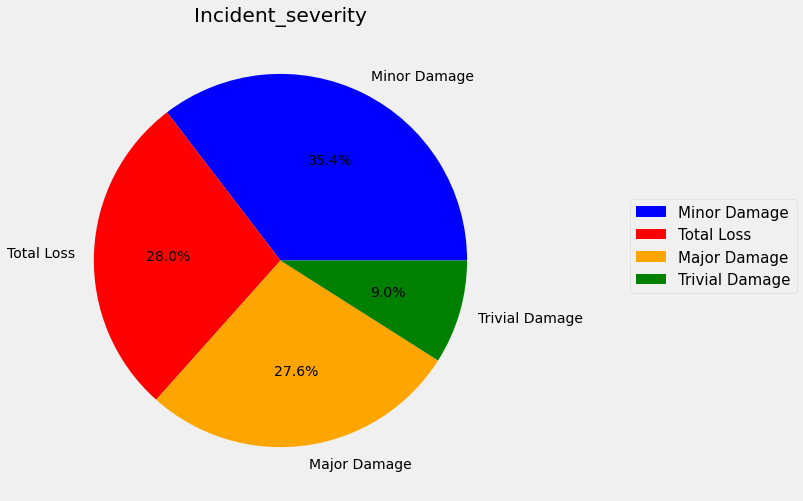

In [53]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
fraud = data['incident_severity'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

color = ['blue', 'red','orange','green',]

plt.pie(size_fraud,labels=fraud.index,colors=color,autopct='%1.1f%%')
plt.title('Incident_severity')
plt.legend(labels=fraud.index,bbox_to_anchor=(1,0.5), loc="center right", fontsize=15,bbox_transform=plt.gcf().transFigure)

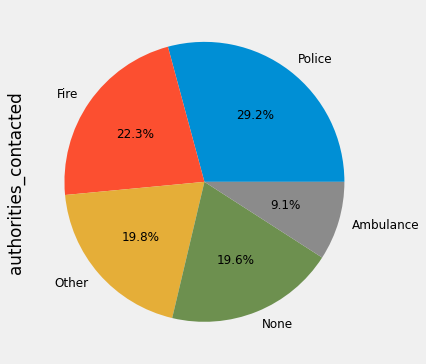

In [167]:
fig = plt.figure(figsize=(10,6))
ax = (data['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12)

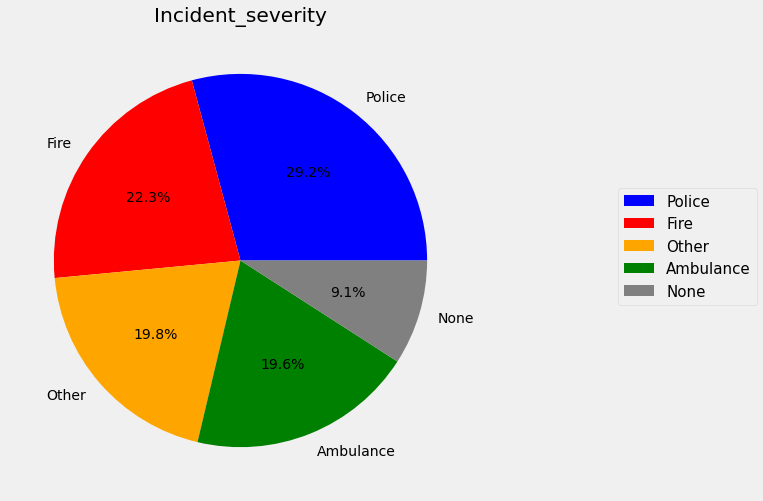

In [169]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
fraud = data['authorities_contacted'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

color = ['blue', 'red','orange','green','grey']

plt.pie(size_fraud,labels=fraud.index,colors=color,autopct='%1.1f%%')
plt.title('Incident_severity')
plt.legend(labels=fraud.index,bbox_to_anchor=(1,0.5), loc="center right", fontsize=15,bbox_transform=plt.gcf().transFigure)

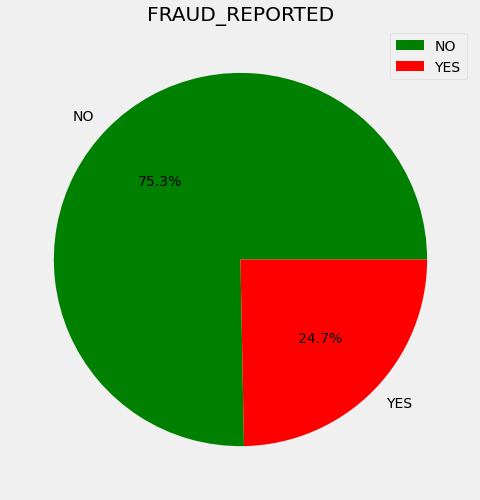

In [54]:
fraud = data['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

color = ['green', 'red']

plt.pie(size_fraud,labels=['NO','YES'],colors=color,autopct='%1.1f%%')
plt.title('FRAUD_REPORTED')
plt.legend(labels=['NO','YES'])

In [55]:
frauds_data=data[data['fraud_reported']=='Y']

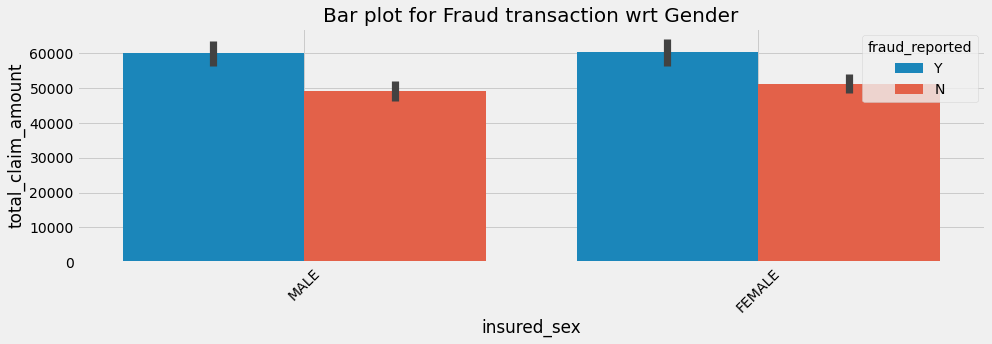

In [56]:
plt.figure(figsize=(14,5))
plt.title("Bar plot for Fraud transaction wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
#converting Y->1 N->0

In [58]:
data['fraud_reported'] = data['fraud_reported'].str.replace('Y', '1')
data['fraud_reported'] = data['fraud_reported'].str.replace('N', '0')
data['fraud_reported'] = data['fraud_reported'].astype(int)

In [59]:
#plot the graph

In [60]:
def vis_data(df, x, y = 'fraud_reported', graph = 'countplot'):
    if graph == 'hist':
        fig = px.histogram(df, x = x)
        fig.update_layout(title = 'Distribution of {x}'.format(x = x))
        fig.show()
    elif graph == 'bar':
      fig = px.bar(df, x = x, y = y)
      fig.update_layout(title = '{x} vs. {y}'.format(x = x, y = y))
      fig.show()
    elif graph == 'countplot':
      a = df.groupby([x,y]).count()
      a.reset_index(inplace = True)
      no_fraud = a[a['fraud_reported'] == 0]
      yes_fraud = a[a['fraud_reported'] == 1]
      trace1 = go.Bar(x = no_fraud[x], y = no_fraud['policy_number'], name = 'No Fraud')
      trace2 = go.Bar(x = yes_fraud[x], y = yes_fraud['policy_number'], name = 'Fraud')
      fig = go.Figure(data = [trace1, trace2])
      fig.update_layout(title = '{x} vs. {y}'.format(x=x, y = y))
      fig.update_layout(barmode = 'group')
      fig.show()

###### insured_sex vs fraud_reported

In [61]:
vis_data(data, 'insured_sex')

###### insured_education_level vs fraud_reported

In [62]:
vis_data(data, 'insured_education_level')

###### insured_occuption vs fraud_reported

In [63]:
vis_data(data, 'insured_occupation')

###### it looks like people in exec-managerial positions have more number of frauds compared to other occupations.Sales, tech-support and transport moving also have relatively high cases of fraud.

###### insured_relationship vs fraud_reported

In [64]:
vis_data(data, 'insured_relationship')

###### incident_type vs fraud_reported

In [65]:
vis_data(data, 'incident_type')

###### Multi-vehicle and single vehicle collisions have more number of frauds compared to parked and vehicle theft. One of the reasons could be that in a collision, there is high possibility of more damage to car, as well as the passengers and hence there is  need to file false insurance claims.

###### collision_type vs fraud_reported

In [66]:
vis_data(data, 'collision_type')

###### While there are significant numbers of false claims in front and side collisions, rear collisions are the highest.This data is for the US and there, many people use dash cams while driving to record whatever is happening while they drive. In rear collisions, the footage from dash cams is not very helpful to onclusively prove whose mistake it was (insurance owner or other car owner). Maybe that is the reason for more fradulent claims in rear collisions.

In [67]:
fraud_data=data[data['fraud_reported']==1]

In [68]:
pd.pivot_table(fraud_data,values=['number_of_vehicles_involved',
                         'total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               Rear Collision                   7.000000   
Vehicle Theft            Rear Collision                   5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               Rear Collision                      1.000000   
Vehicle Theft            Rear Collision                      1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               Rear Collision          5093.750000    3711.250000  
Vehicle Theft            Rear Collision          5197.500000    3665.000000

#### For auto claims, single vehicle side collision have claimed highest

In [69]:
pd.pivot_table(fraud_data,values=['total_claim_amount','vehicle_claim'],index=['incident_state','incident_city']).sort_values('total_claim_amount',ascending=False)[:20]

total_claim_amount  vehicle_claim
incident_state incident_city                                   
SC             Riverwood            78980.000000   56553.333333
OH             Columbus             78100.000000   54670.000000
NC             Northbrook           76653.333333   55346.666667
WV             Northbrook           75205.000000   53997.500000
SC             Springfield          73116.666667   50267.500000
NY             Northbrook           69730.000000   50758.571429
NC             Springfield          69270.000000   51032.000000
NY             Springfield          67157.000000   47976.000000
OH             Northbrook           66550.000000   46585.000000
PA             Hillsdale            66480.000000   49860.000000
WV             Arlington            66077.142857   45911.428571
               Hillsdale            65931.666667   46198.333333
               Northbend            65786.000000   49410.000000
NY             Columbus             65067.777778   47463.333333
SC             Northbend            64135.555556   46540.000000
NY             Hillsdale            64012.857143   47301.428571
               Northbend            63797.500000   45491.250000
SC             Arlington            63037.500000   44675.000000
VA             Springfield          61665.000000   47475.000000
               Columbus             61635.000000   45662.500000

#### Riverwood city from SC state have claimed maximum amount of fraud for auto insurance

###### incident_severity vs fruad_reported

In [70]:
vis_data(data, 'incident_severity')

###### Here, compared to minor damage, total loss and trivial damage, fraudulent claims are highest in major damage.One reason could be that the high amount of repair cost which will be incurred by the insurer due to major damage.

###### authorities_contacted vs fraud_reported

In [71]:
vis_data(data, 'authorities_contacted')

###### insured_hobbies  vs fraud_reported

In [72]:
vis_data(data, 'insured_hobbies')

###### One thing which is striking in this graph is that people with chess and cross-fit as hobby have extremely high number of fraudulent claims.

###### Age attribute

In [73]:
data['age'].describe()

count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64

In [74]:
vis_data(data, 'age', '-', 'hist')

###### We will bin the ages and then check the trend for fraud vs. no fraud according to age.###### 

In [75]:
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

data['age_group'] = pd.cut(data['age'], bins = bins, labels = bin_labels, include_lowest = True)

In [76]:
data['age_group']

0      46-50
1      41-45
2      26-30
3      41-45
4      41-45
       ...  
995    36-40
996    41-45
997    31-35
998    61-65
999    56-60
Name: age_group, Length: 1000, dtype: category
Categories (10, object): [15-20 < 21-25 < 26-30 < 31-35 ... 46-50 < 51-55 < 56-60 < 61-65]

###### age_group vs fraud_reported 

In [77]:
vis_data(data, 'age_group')

###### People in the age group of 31-35 and 41-45 have more number of frauds

In [78]:
data['months_as_customer'].describe()

count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

###### months as customer

In [79]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

data['months_as_customer_groups'] = pd.cut(data['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

In [80]:
vis_data(data, 'months_as_customer_groups')

In [81]:
vis_data(data, 'auto_make')

In [82]:
vis_data(data, 'number_of_vehicles_involved')

In [83]:
vis_data(data, 'witnesses', 'fraud_reported')

In [84]:
vis_data(data, 'bodily_injuries')

In [85]:
vis_data(data, 'total_claim_amount', 'y', 'hist')

In [86]:
bin_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k',
             '100k-110k','110k-120k']
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,110000,120000]

data['claim_amount'] = pd.cut(data['total_claim_amount'], bins = bins, labels = bin_labels, include_lowest = True)

In [87]:
vis_data(data, 'claim_amount')

In [88]:
vis_data(data, 'incident_hour_of_the_day')

In [89]:
vis_data(data, 'auto_year')

In [90]:
vis_data(data, 'auto_make')

#### Auto make of 'Ford' and 'Mercedes' are having highest Fraud claim, 'Chevorlet' and 'Audi' also seems to be claimed equally having Fraud claims

In [91]:
vis_data(data, 'auto_model')

In [92]:
data['policy_annual_premium'].describe()

count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

In [93]:
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

data['policy_annual_premium_groups'] = pd.cut(data['policy_annual_premium'], bins = bins, labels=bin_labels)

In [94]:
vis_data(data, 'policy_annual_premium_groups')

In [95]:
data['policy_deductable'].describe()

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

In [96]:
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

data['policy_deductable_group'] = pd.cut(data['policy_deductable'], bins = bins, labels = bin_labels)

vis_data(data, 'policy_deductable_group')

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

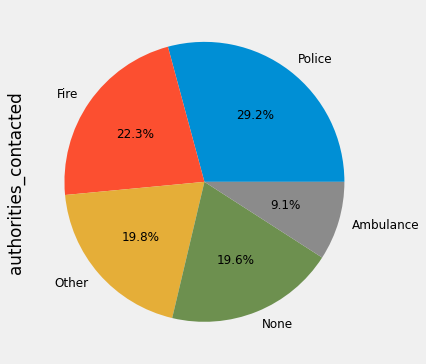

In [97]:
vis_data(data, 'property_damage')

In [98]:
vis_data(data, 'police_report_available')

In [178]:
fig = px.scatter(data, x = 'policy_state', y = 'incident_type', color = 'incident_severity',
                marginal_x = 'histogram', marginal_y = 'histogram')
fig.show()

In [99]:
fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
fig.show()

In [170]:
fig = px.scatter_matrix(data, dimensions=["injury_claim", "property_claim", "vehicle_claim"],
                        color = "insured_sex")
fig.show()

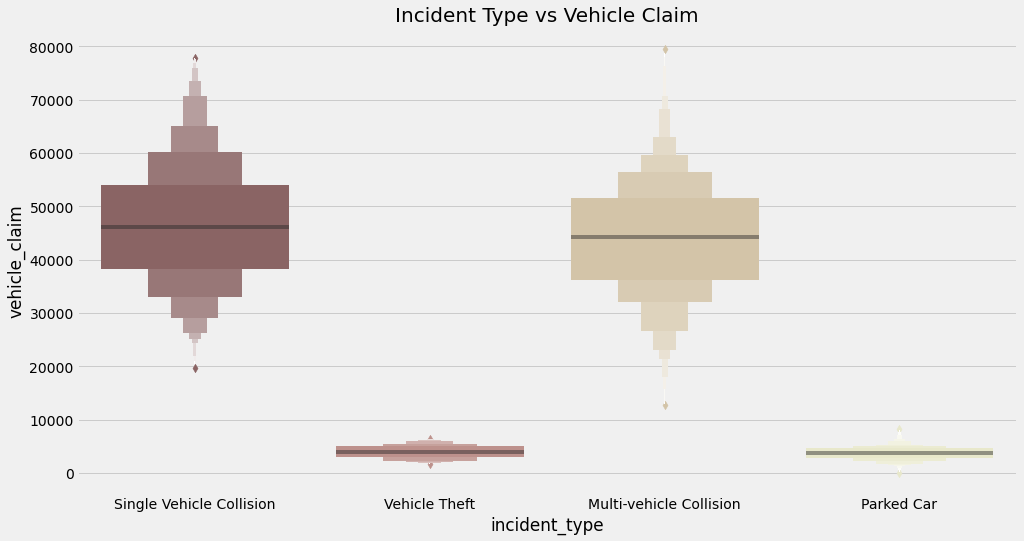

In [171]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data['incident_type'], data['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

In [100]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

NameError: name 'X' is not defined

<Figure size 1440x1080 with 0 Axes>

In [123]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'csl_per_person',
       'csl_per_accident'],
      dtype='object')

In [121]:
df=data.copy()

In [126]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [128]:
X.drop(['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state',
        'incident_city','auto_make','auto_model', 'auto_year','injury_claim', 'property_claim', 'vehicle_claim','policy_csl','age'
        
        ],axis=1,inplace=True)

In [130]:
X.head()

months_as_customer  policy_deductable  policy_annual_premium  \
0                 328               1000                1406.91   
1                 228               2000                1197.22   
2                 134               2000                1413.14   
3                 256               2000                1415.74   
4                 228               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  ...  \
0        sleeping              husband          53300  ...   
1         reading       other-relative              0  ...   
2     board-games            own-child          35100  ...   
3     board-games            unmarried          48900  ...   
4     board-games            unmarried          66000  ...   

   authorities_contacted incident_hour_of_the_day number_of_vehicles_involved  \
0                 Police                        5                           1   
1                 Police                        8                           1   
2                 Police                        7                           3   
3                 Police                        5                           1   
4                   None                       20                           1   

  property_damage bodily_injuries  witnesses  police_report_available  \
0             YES               1          2                      YES   
1              NO               0          0                       NO   
2              NO               2          3                       NO   
3              NO               1          2                       NO   
4              NO               0          1                       NO   

  total_claim_amount  csl_per_person  csl_per_accident  
0              71610             250               500  
1               5070             250               500  
2              34650             100               300  
3              63400             250               500  
4               6500             500              1000  

[5 rows x 24 columns]

# Features

In [214]:
X.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_

In [133]:
cat_df = X.select_dtypes(include = ['object'])

In [134]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [135]:
cat_df.columns

Index(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-jumping',
       'insured_hobbies_camping', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured

In [136]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [137]:
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  total_claim_amount  
0                1          2               71610  
1                0          0                5070  
2                2          3               34650  
3                1          2               63400  
4                0          1                6500

In [138]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

###### outliers

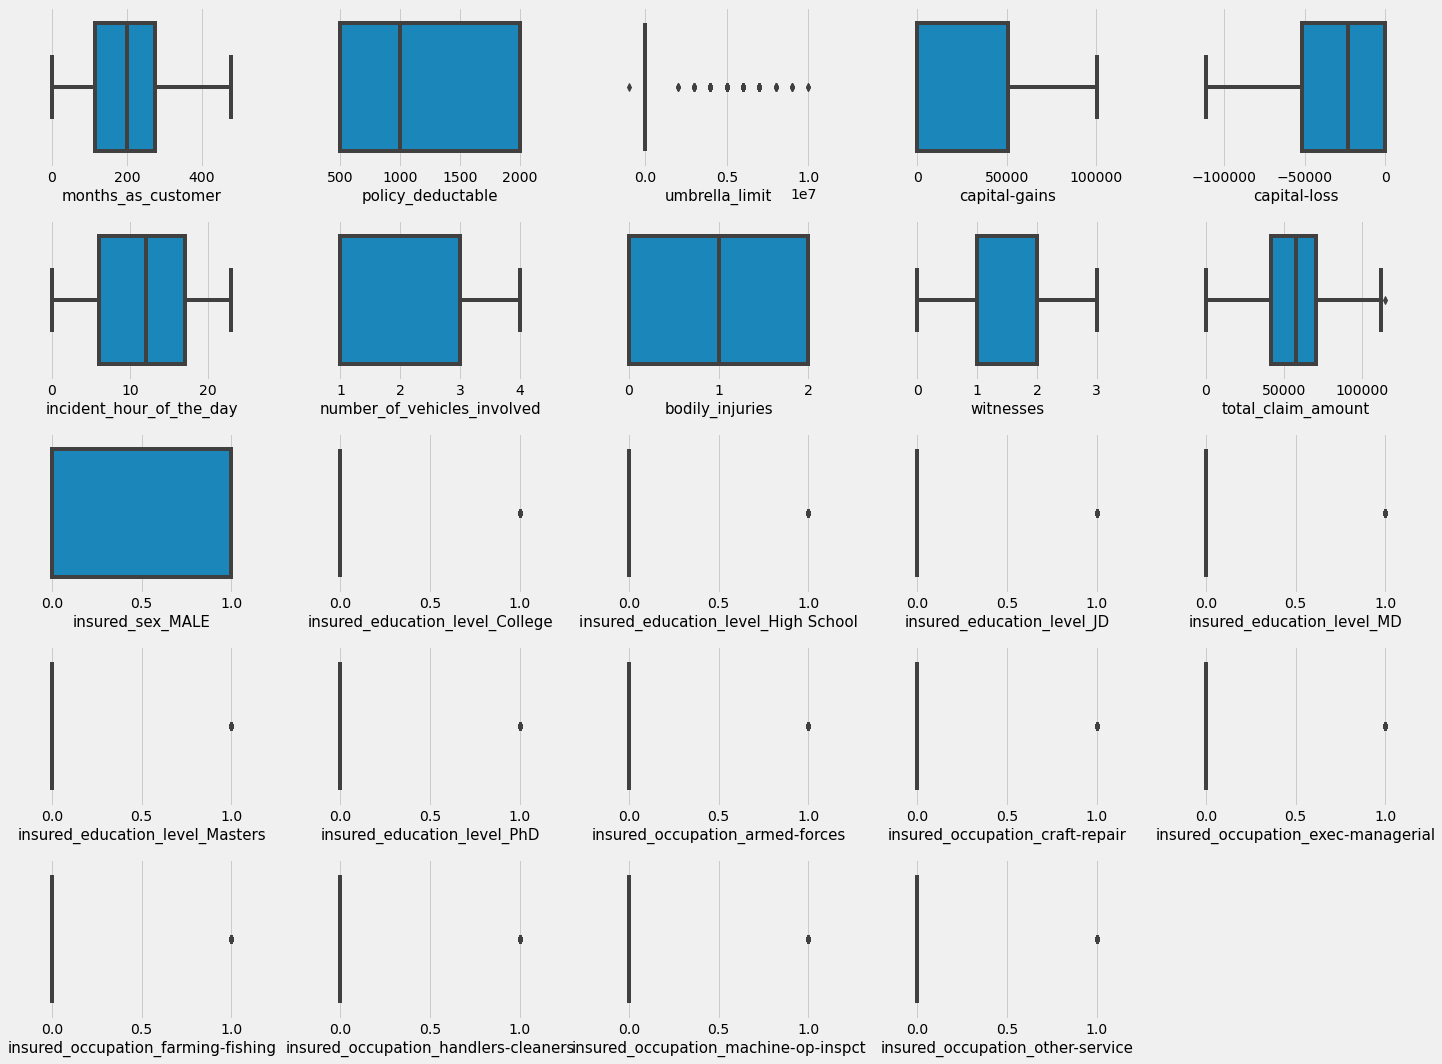

In [139]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [144]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [148]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount'],
      dtype='object')

In [149]:
num_df = X_train[num_df.columns]

In [150]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [151]:
scaled_data

array([[-1.46586636, -0.19792174,  2.16330914, ...,  1.20007482,
        -0.4246638 ,  1.08481678],
       [ 0.33004707,  1.45142607,  2.16330914, ..., -0.00320876,
         0.46999309,  0.54237173],
       [ 0.68235545,  1.45142607, -0.4734436 , ..., -1.20649233,
         1.36464997, -1.74150899],
       ...,
       [-0.11678307, -1.02259564, -0.4734436 , ..., -1.20649233,
        -1.31932069, -0.27316635],
       [-0.14256173, -1.02259564, -0.4734436 , ..., -1.20649233,
        -1.31932069, -0.27316635],
       [-0.88155003, -0.19792174, -0.4734436 , ...,  1.20007482,
         0.46999309, -1.8410196 ]])

In [152]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
465           -1.465866          -0.197922        2.163309       0.708224   
868            0.330047           1.451426        2.163309      -0.916274   
410            0.682355           1.451426       -0.473444      -0.916274   
783           -0.701099          -1.022596       -0.473444      -0.916274   
337           -0.383163          -0.197922       -0.473444      -0.916274   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
465     -1.199135                  0.616607                    -0.825700   
868     -1.234818                  0.472495                     1.149659   
410     -0.835173                 -0.392177                    -0.825700   
783     -0.774512                 -1.545073                    -0.825700   
337     -0.952925                  0.184271                    -0.825700   

     bodily_injuries  witnesses  total_claim_amount  
465         1.200075  -0.424664            1.084817  
868        -0.003209   0.469993            0.542372  
410        -1.206492   1.364650           -1.741509  
783        -1.206492  -0.424664           -1.771063  
337         1.200075  -1.319321            0.669192

In [153]:
X_train

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
465                  33               1000         6000000          45500   
868                 242               2000         6000000              0   
410                 283               2000               0              0   
783                 122                500               0              0   
337                 159               1000               0              0   
..                  ...                ...             ...            ...   
99                  239               1000               0              0   
495                 261               1000               0              0   
955                 190                500               0          61900   
821                 187                500               0          59500   
333                 101               1000               0              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
465        -60600                        16                            1   
868        -61600                        15                            3   
410        -50400                         9                            1   
783        -48700                         1                            1   
337        -53700                        13                            1   
..            ...                       ...                          ...   
99              0                        10                            1   
495        -49400                        19                            1   
955        -50000                        14                            1   
821             0                         7                            3   
333             0                         4                            1   

     bodily_injuries  witnesses  total_claim_amount  ...  \
465                2          1               81400  ...   
868                1          2               66900  ...   
410                0          3                5850  ...   
783                0          1                5060  ...   
337                2          0               70290  ...   
..               ...        ...                 ...  ...   
99                 0          0                5600  ...   
495                0          3               80280  ...   
955                0          0               45100  ...   
821                0          0               45100  ...   
333                2          2                3190  ...   

     authorities_contacted_Fire  authorities_contacted_None  \
465                           0                           0   
868                           0                           0   
410                           0                           1   
783                           0                           1   
337                           0                           0   
..                          ...                         ...   
99                            0                           1   
495                           0                           0   
955                           0                           0   
821                           1                           0   
333                           0                           1   

     authorities_contacted_Other  authorities_contacted_Police  \
465                            0                             1   
868                            1                             0   
410                            0                             0   
783                            0                             0   
337                            0                             1   
..                           ...                           ...   
99                             0                             0   
495                            1                             0   
955                            1                             0   
821                          

In [215]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [216]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [156]:
X_train

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
465           -1.465866          -0.197922        2.163309       0.708224   
868            0.330047           1.451426        2.163309      -0.916274   
410            0.682355           1.451426       -0.473444      -0.916274   
783           -0.701099          -1.022596       -0.473444      -0.916274   
337           -0.383163          -0.197922       -0.473444      -0.916274   
..                  ...                ...             ...            ...   
99             0.304268          -0.197922       -0.473444      -0.916274   
495            0.493312          -0.197922       -0.473444      -0.916274   
955           -0.116783          -1.022596       -0.473444       1.293757   
821           -0.142562          -1.022596       -0.473444       1.208069   
333           -0.881550          -0.197922       -0.473444      -0.916274   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
465     -1.199135                  0.616607                    -0.825700   
868     -1.234818                  0.472495                     1.149659   
410     -0.835173                 -0.392177                    -0.825700   
783     -0.774512                 -1.545073                    -0.825700   
337     -0.952925                  0.184271                    -0.825700   
..            ...                       ...                          ...   
99       0.963230                 -0.248065                    -0.825700   
495     -0.799490                  1.048944                    -0.825700   
955     -0.820900                  0.328383                    -0.825700   
821      0.963230                 -0.680401                     1.149659   
333      0.963230                 -1.112737                    -0.825700   

     bodily_injuries  witnesses  total_claim_amount  ...  \
465         1.200075  -0.424664            1.084817  ...   
868        -0.003209   0.469993            0.542372  ...   
410        -1.206492   1.364650           -1.741509  ...   
783        -1.206492  -0.424664           -1.771063  ...   
337         1.200075  -1.319321            0.669192  ...   
..               ...        ...                 ...  ...   
99         -1.206492  -1.319321           -1.750861  ...   
495        -1.206492   1.364650            1.042918  ...   
955        -1.206492  -1.319321           -0.273166  ...   
821        -1.206492  -1.319321           -0.273166  ...   
333         1.200075   0.469993           -1.841020  ...   

     authorities_contacted_Fire  authorities_contacted_None  \
465                           0                           0   
868                           0                           0   
410                           0                           1   
783                           0                           1   
337                           0                           0   
..                          ...                         ...   
99                            0                           1   
495                           0                           0   
955                           0                           0   
821                           1                           0   
333                           0                           1   

     authorities_contacted_Other  authorities_contacted_Police  \
465                            0                             1   
868                            1                             0   
410                            0                             0   
783                            0                             0   
337                            0                             1   
..                           ...                           ...   
99                             0                             0   
495                            1                             0   
955                            1                             0   
821                          

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [217]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7506666666666667
Test accuracy of KNN is : 0.82
[[181  10]
 [ 35  24]]
              precision    recall  f1-score   support

           N       0.84      0.95      0.89       191
           Y       0.71      0.41      0.52        59

    accuracy                           0.82       250
   macro avg       0.77      0.68      0.70       250
weighted avg       0.81      0.82      0.80       250



In [159]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [160]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.96
Test accuracy of Random Forest is : 0.82
[[181  10]
 [ 35  24]]
              precision    recall  f1-score   support

           N       0.84      0.95      0.89       191
           Y       0.71      0.41      0.52        59

    accuracy                           0.82       250
   macro avg       0.77      0.68      0.70       250
weighted avg       0.81      0.82      0.80       250



In [164]:
y_test

709    Y
609    N
26     N
70     Y
470    Y
      ..
653    N
461    N
278    Y
914    N
138    N
Name: fraud_reported, Length: 250, dtype: object

In [163]:
y_pred

array(['N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N